In [2]:
import streamlit as st
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import kagglehub
thedevastator_drug_performance_evaluation_path = kagglehub.dataset_download('thedevastator/drug-performance-evaluation')

print('Data source import complete.')

c:\Users\ankit\OneDrive\Desktop\projects\drug performance\myenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Data source import complete.


In [4]:

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
import os

# Construct the correct path to the CSV file
drug_csv_path = os.path.join(thedevastator_drug_performance_evaluation_path, 'Drug.csv')

# Read the CSV file
df = pd.read_csv(drug_csv_path)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2219 entries, 0 to 2218
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Condition     2219 non-null   object 
 1   Drug          2219 non-null   object 
 2   Indication    2219 non-null   object 
 3   Type          2219 non-null   object 
 4   Reviews       2219 non-null   object 
 5   Effective     2219 non-null   float64
 6   EaseOfUse     2219 non-null   float64
 7   Satisfaction  2219 non-null   float64
 8   Information   2219 non-null   object 
dtypes: float64(3), object(6)
memory usage: 156.1+ KB


In [7]:
df.columns

Index(['Condition', 'Drug', 'Indication', 'Type', 'Reviews', 'Effective',
       'EaseOfUse', 'Satisfaction', 'Information'],
      dtype='object')

In [7]:
df.shape

(2219, 9)

In [8]:
df.head()

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction,Information
0,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994 Reviews,2.52,3.01,1.84,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...
1,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994 Reviews,2.52,3.01,1.84,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...
2,Acute Bacterial Sinusitis,Moxifloxacin,On Label,RX,755 Reviews,2.78,3.00,2.08,\r\n\t\t\t\t\t This is a generic drug. The ave...
3,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584 Reviews,3.21,4.01,2.57,\r\n\t\t\t\t\tAzithromycin is an antibiotic (m...
4,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584 Reviews,3.21,4.01,2.57,\r\n\t\t\t\t\tAzithromycin is an antibiotic (m...


In [9]:
df.describe()

,Effective,EaseOfUse,Satisfaction
count,2219.000000,2219.000000,2219.000000
mean,3.557972,3.958824,3.218774
std,1.113128,1.037877,1.230933
min,1.000000,1.000000,1.000000
25%,3.000000,3.540000,2.400000
50%,3.680000,4.100000,3.130000
75%,4.330000,5.000000,4.000000
max,5.000000,5.000000,5.000000


In [10]:
df.duplicated().sum()

466

In [9]:
df['Reviews'] = df['Reviews'].str.replace(r'\D+', '', regex=True).astype(float)#regex= regular expression


In [10]:
df.head(2)

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction,Information
0,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994.0,2.52,3.01,1.84,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...
1,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994.0,2.52,3.01,1.84,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...


In [13]:
df.describe()

,Reviews,Effective,EaseOfUse,Satisfaction
count,2219.000000,2219.000000,2219.000000,2219.000000
mean,74.227129,3.557972,3.958824,3.218774
std,245.467102,1.113128,1.037877,1.230933
min,1.000000,1.000000,1.000000,1.000000
25%,1.000000,3.000000,3.540000,2.400000
50%,6.000000,3.680000,4.100000,3.130000
75%,43.000000,4.330000,5.000000,4.000000
max,4647.000000,5.000000,5.000000,5.000000


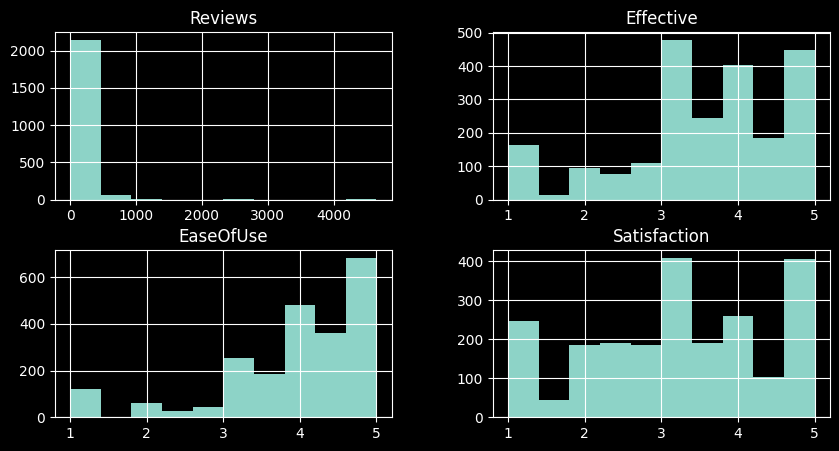

In [14]:
df.hist(figsize=(10,5))
plt.show()

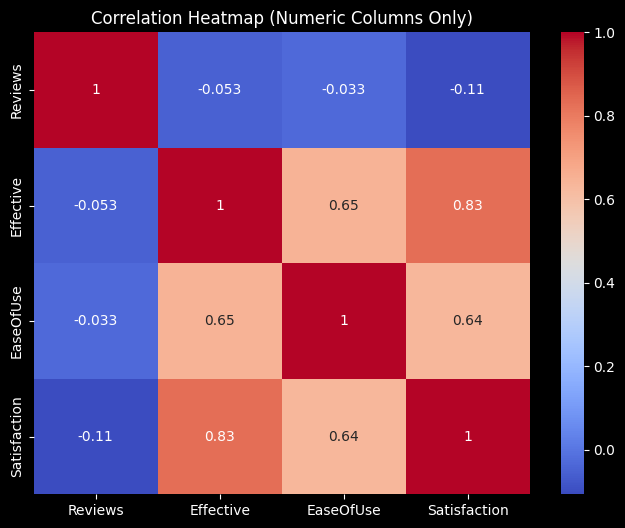

In [15]:
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()

In [16]:
df.drop(columns = ['Type','Indication', 'Reviews'] , inplace= True, axis = 1)

In [17]:
df.describe()

,Effective,EaseOfUse,Satisfaction
count,2219.000000,2219.000000,2219.000000
mean,3.557972,3.958824,3.218774
std,1.113128,1.037877,1.230933
min,1.000000,1.000000,1.000000
25%,3.000000,3.540000,2.400000
50%,3.680000,4.100000,3.130000
75%,4.330000,5.000000,4.000000
max,5.000000,5.000000,5.000000


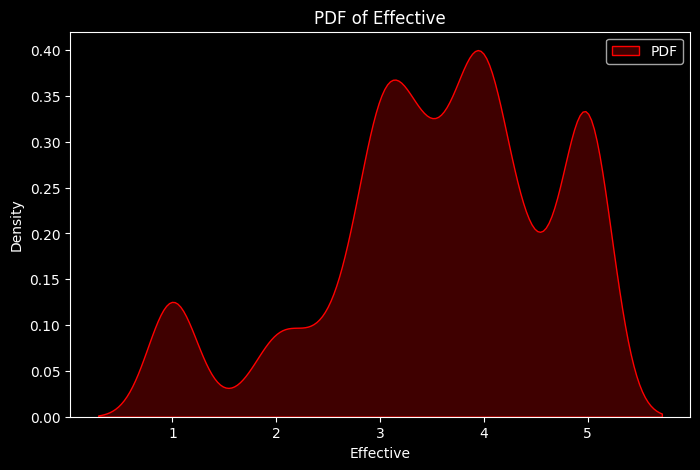

In [18]:
col = 'Effective'
data = df[col].dropna()#dropna is to drop out the missing values from the dataset
plt.figure(figsize=(8, 5))
sns.kdeplot(data, fill=True, label="PDF", color='red')
plt.title(f"PDF of {col}")
plt.xlabel(col)
plt.ylabel("Density")
plt.legend()
plt.show()

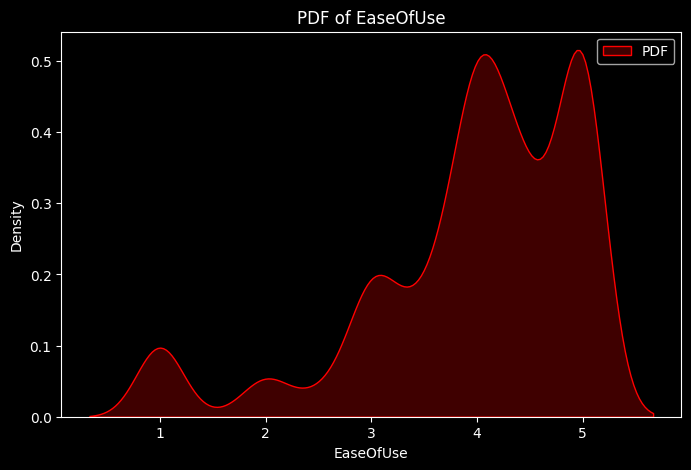

In [19]:
col = 'EaseOfUse'
data = df[col].dropna()#dropna is to drop out the missing values from the dataset
plt.figure(figsize=(8, 5))
sns.kdeplot(data, fill=True, label="PDF", color='red')
plt.title(f"PDF of {col}")
plt.xlabel(col)
plt.ylabel("Density")
plt.legend()
plt.show()

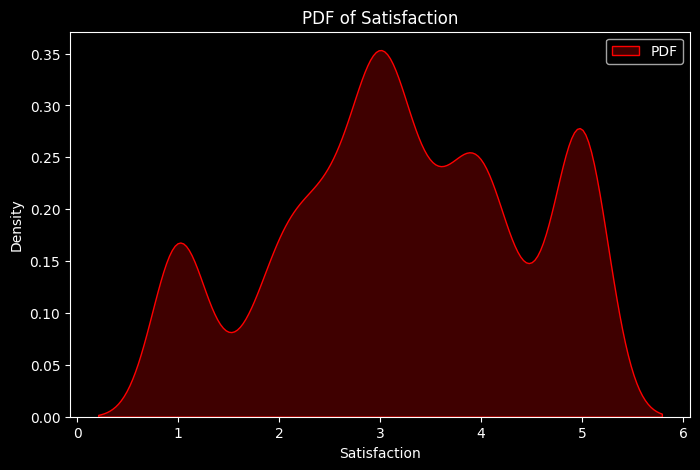

In [20]:
col = 'Satisfaction'
data = df[col].dropna()#dropna is to drop out the missing values from the dataset
plt.figure(figsize=(8, 5))
sns.kdeplot(data, fill=True, label="PDF", color='red')
plt.title(f"PDF of {col}")
plt.xlabel(col)
plt.ylabel("Density")
plt.legend()
plt.show()

In [21]:
%matplotlib inline

In [22]:
import sys
print("Kernel Python:", sys.executable)


Kernel Python: c:\Users\ankit\OneDrive\Desktop\projects\drug performance\myenv\Scripts\python.exe


In [23]:
import sys
! "{sys.executable}" -m pip install --upgrade pip
! "{sys.executable}" -m pip install scipy


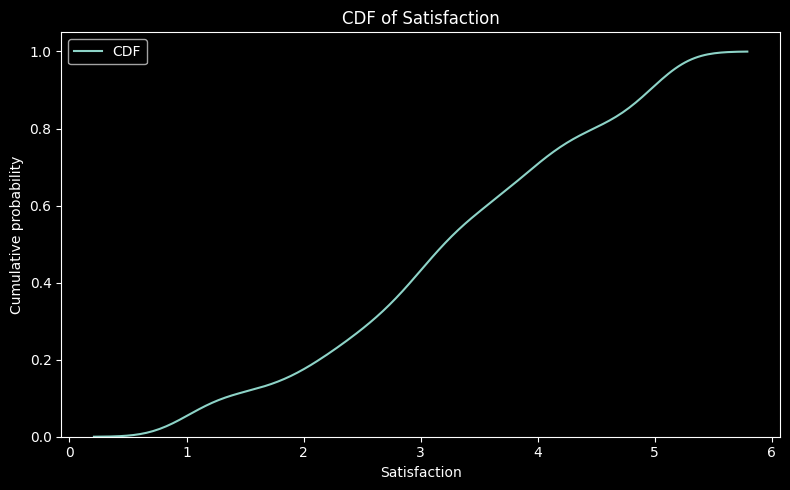

In [24]:

col = 'Satisfaction'
series = pd.to_numeric(df[col], errors="coerce").dropna()

plt.figure(figsize=(8,5))
sns.kdeplot(series, cumulative=True, label="CDF")
plt.title(f"CDF of {col}")
plt.xlabel(col); plt.ylabel("Cumulative probability")
plt.legend(); plt.tight_layout(); plt.show()

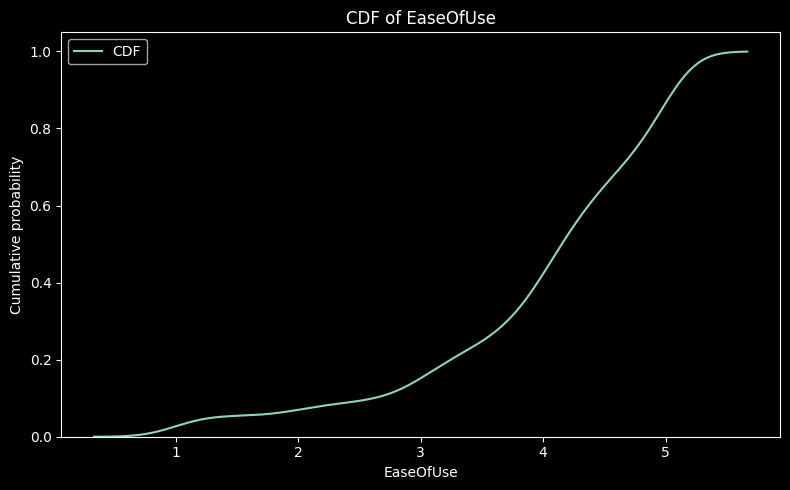

In [25]:

col = 'EaseOfUse'
series = pd.to_numeric(df[col], errors="coerce").dropna()

plt.figure(figsize=(8,5))
sns.kdeplot(series, cumulative=True, label="CDF")
plt.title(f"CDF of {col}")
plt.xlabel(col); plt.ylabel("Cumulative probability")
plt.legend(); plt.tight_layout(); plt.show()

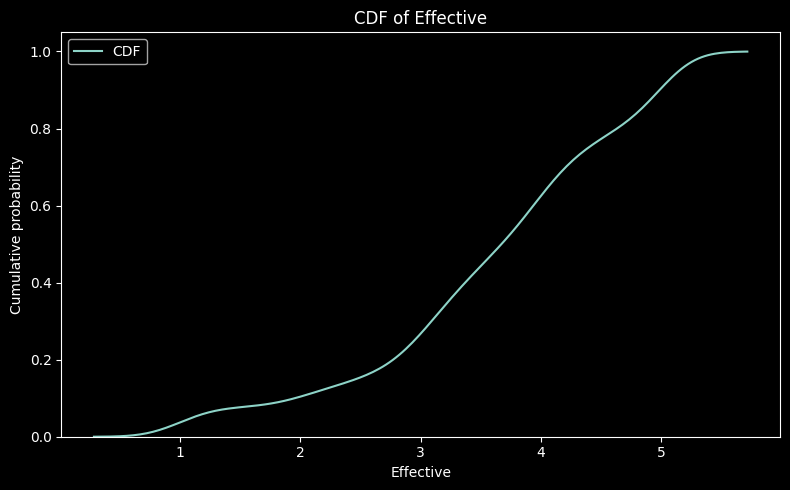

In [26]:

col = 'Effective'
series = pd.to_numeric(df[col], errors="coerce").dropna()

plt.figure(figsize=(8,5))
sns.kdeplot(series, cumulative=True, label="CDF")
plt.title(f"CDF of {col}")
plt.xlabel(col); plt.ylabel("Cumulative probability")
plt.legend(); plt.tight_layout(); plt.show()

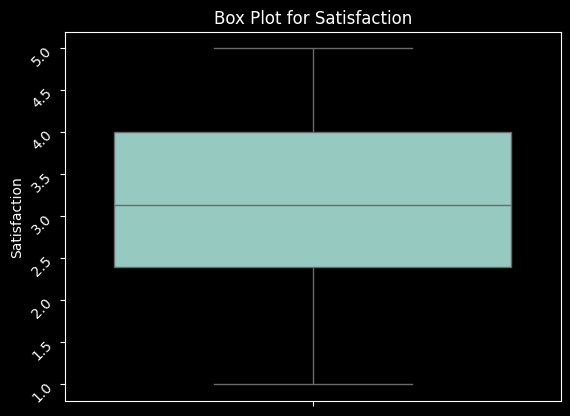

In [27]:
sns.boxplot(y=df['Satisfaction'])
plt.title("Box Plot for Satisfaction")
plt.yticks(rotation=45)
plt.show()

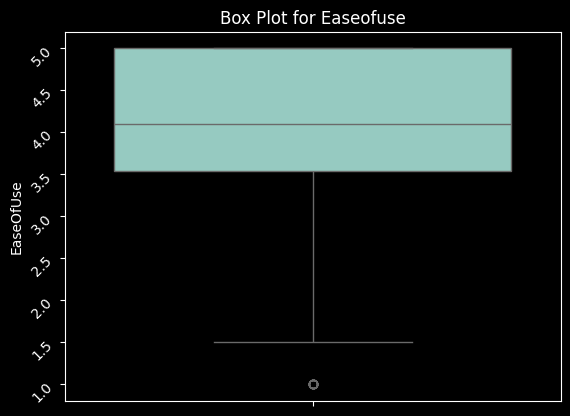

In [28]:
sns.boxplot(y=df['EaseOfUse'])
plt.title("Box Plot for Easeofuse")
plt.yticks(rotation=45)
plt.show()

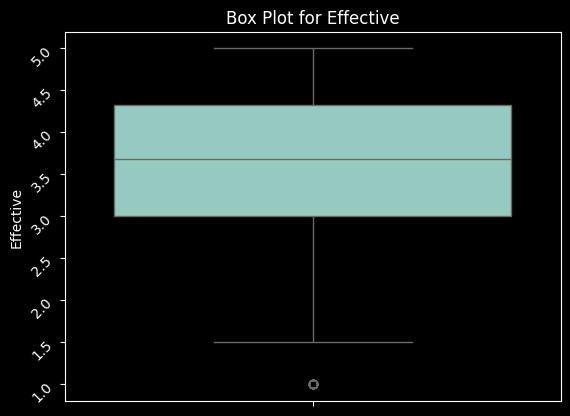

In [29]:
sns.boxplot(y=df['Effective'])
plt.title("Box Plot for Effective")
plt.yticks(rotation=45)
plt.show()

C:\Users\ankit\AppData\Local\Temp\ipykernel_17784\362704126.py:1: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(data=df, x='Satisfaction',inner= 'quartile',scale='count')


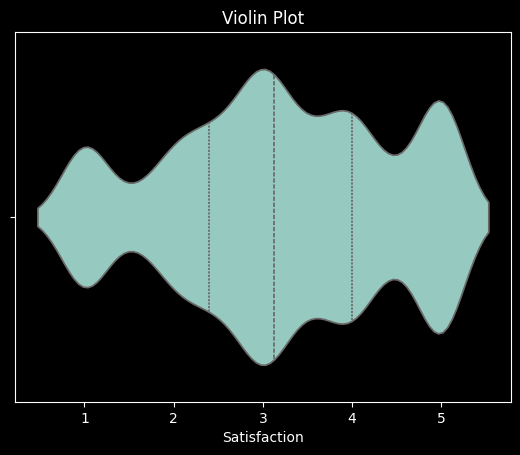

In [30]:
sns.violinplot(data=df, x='Satisfaction',inner= 'quartile',scale='count')
plt.title("Violin Plot")
plt.show()




C:\Users\ankit\AppData\Local\Temp\ipykernel_17784\2617025604.py:1: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(data=df, x='EaseOfUse',inner= 'quartile',scale='count')


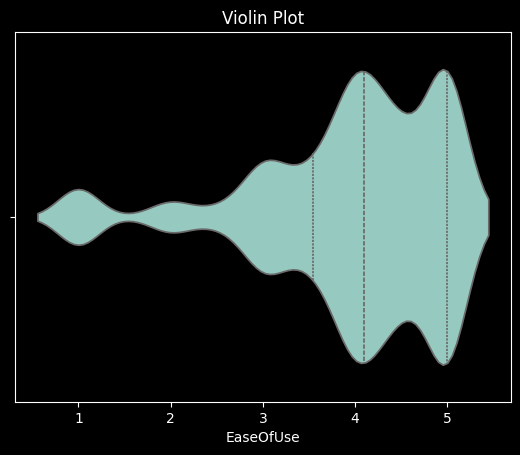

In [31]:
sns.violinplot(data=df, x='EaseOfUse',inner= 'quartile',scale='count')
plt.title("Violin Plot")
plt.show()




C:\Users\ankit\AppData\Local\Temp\ipykernel_17784\2977385464.py:1: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(data=df, x='Effective',inner= 'quartile',scale='count')


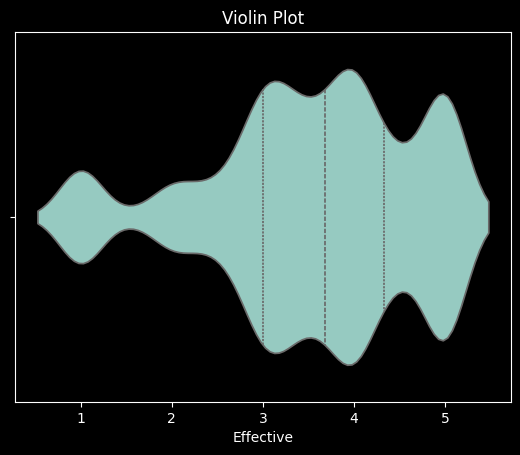

In [32]:
sns.violinplot(data=df, x='Effective',inner= 'quartile',scale='count')
plt.title("Violin Plot")
plt.show()




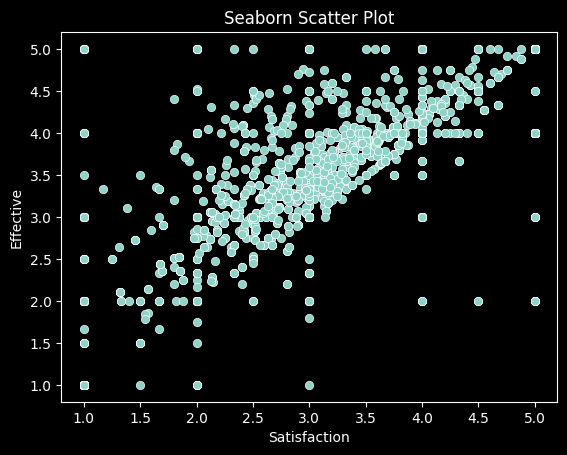

In [33]:
sns.scatterplot(x='Satisfaction', y='Effective', data=df)
plt.title("Seaborn Scatter Plot")
plt.show()

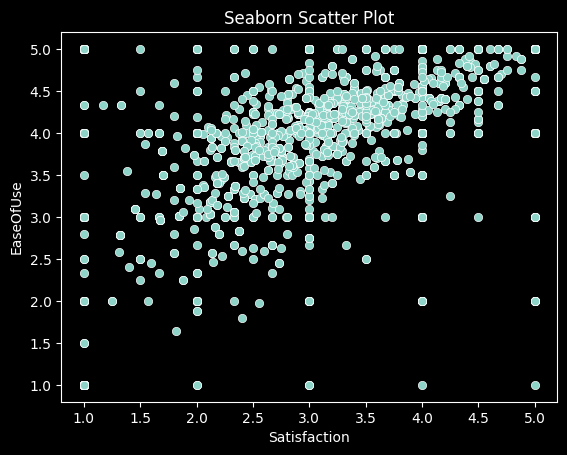

In [34]:
sns.scatterplot(x='Satisfaction', y='EaseOfUse', data=df)
plt.title("Seaborn Scatter Plot")
plt.show()

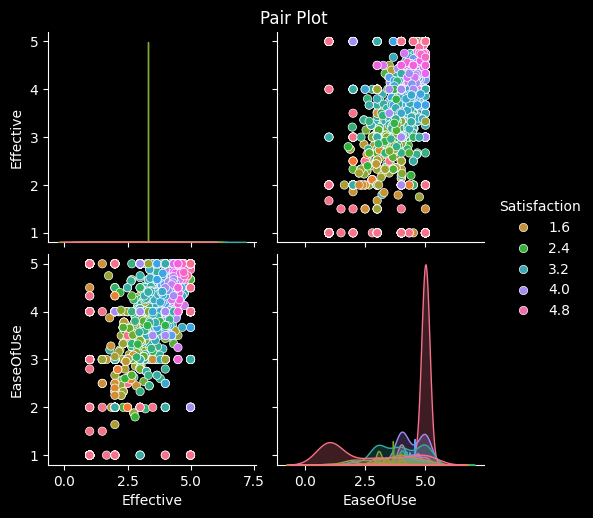

In [35]:
sns.pairplot(df, hue='Satisfaction', diag_kind='kde', palette='husl')
plt.suptitle("Pair Plot", y=1.02)
plt.show()

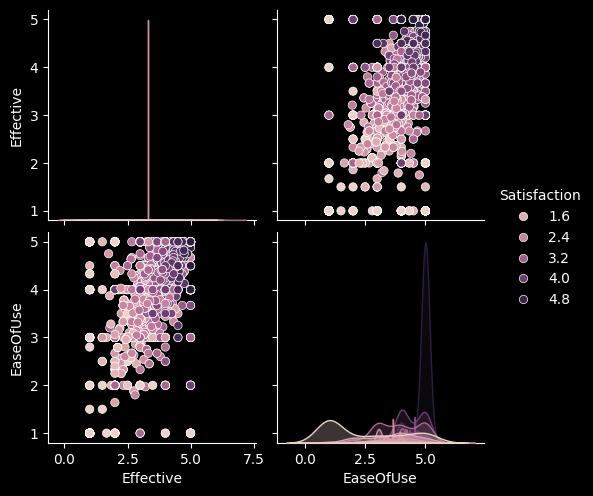

In [36]:
sns.pairplot(df, hue='Satisfaction')

In [37]:
df.head(1)

,Condition,Drug,Effective,EaseOfUse,Satisfaction,Information
0,Acute Bacterial Sinusitis,Levofloxacin,2.52,3.01,1.84,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...


In [38]:
df.drop(columns= ['Information'], inplace= True, axis=1)

In [39]:
df.head(1)

,Condition,Drug,Effective,EaseOfUse,Satisfaction
0,Acute Bacterial Sinusitis,Levofloxacin,2.52,3.01,1.84


In [40]:
df.describe()

,Effective,EaseOfUse,Satisfaction
count,2219.000000,2219.000000,2219.000000
mean,3.557972,3.958824,3.218774
std,1.113128,1.037877,1.230933
min,1.000000,1.000000,1.000000
25%,3.000000,3.540000,2.400000
50%,3.680000,4.100000,3.130000
75%,4.330000,5.000000,4.000000
max,5.000000,5.000000,5.000000


# classification task

In [74]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assume 'drug_csv_path' is the path to your data file
# For example: drug_csv_path = 'your_data.csv'
df = pd.read_csv(drug_csv_path)

# 1. Define Features (X) and Target (y)
# The target 'y' is just the 'Condition' column.
# The features 'X' are all columns except 'Condition'.
X = df.drop('Condition', axis=1)
y = df['Condition']

# 2. Encode the Target Variable
# We only need to encode our single target column 'Condition'.
le_cond = LabelEncoder()
y_encoded = le_cond.fit_transform(y)

# 3. Preprocess the Features
# Identify which columns are categorical and which are numerical.
cat_cols = ['Drug', 'Information']
num_cols = ['EaseOfUse', 'Effective', 'Satisfaction']

# One-Hot Encode the categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_cat = encoder.fit_transform(X[cat_cols])

# Scale the numerical features (and fill missing values with 0)
scaler = StandardScaler()
X_num = scaler.fit_transform(X[num_cols].fillna(0))

# Combine the processed numerical and categorical features into one array
X_processed = np.hstack([X_num, X_cat])

# 4. Split the Data into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_encoded, test_size=0.2, random_state=42
)

# 5. Train the Logistic Regression Model
# We only need one model now, to predict the condition.
clf_cond = LogisticRegression(max_iter=1000, solver='lbfgs')
clf_cond.fit(X_train, y_train)

# 6. Make Predictions and Evaluate the Model
y_pred = clf_cond.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print("Condition Prediction Performance:")
print(f"  Accuracy:  {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall:    {recall:.4f}")
print(f"  F1 Score:  {f1:.4f}")

Condition Prediction Performance:
  Accuracy:  0.6869
  Precision: 0.6881
  Recall:    0.6869
  F1 Score:  0.6708


In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier # <-- Import the new model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assume 'drug_csv_path' is the path to your data file
# For example: drug_csv_path = 'your_data.csv'
df = pd.read_csv(drug_csv_path)

# 1. Define Features (X) and Target (y)
X = df.drop('Condition', axis=1)
y = df['Condition']

# 2. Encode the Target Variable
le_cond = LabelEncoder()
y_encoded = le_cond.fit_transform(y)

# 3. Preprocess the Features
cat_cols = ['Drug', 'Information']
num_cols = ['EaseOfUse', 'Effective', 'Satisfaction']

# One-Hot Encode the categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_cat = encoder.fit_transform(X[cat_cols])

# Scale the numerical features
scaler = StandardScaler()
X_num = scaler.fit_transform(X[num_cols].fillna(0))

# Combine the processed features
X_processed = np.hstack([X_num, X_cat])

# 4. Split the Data into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_encoded, test_size=0.2, random_state=42
)

# 5. Train the Random Forest Model
# We swap out LogisticRegression for RandomForestClassifier.
# n_estimators is the number of "trees" in the forest. 100 is a good starting point.
clf_cond = RandomForestClassifier(n_estimators=100, random_state=42)
clf_cond.fit(X_train, y_train)

# 6. Make Predictions and Evaluate the Model
y_pred = clf_cond.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print("Condition Prediction Performance (Random Forest):")
print(f"  Accuracy:  {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall:    {recall:.4f}")
print(f"  F1 Score:  {f1:.4f}")

Condition Prediction Performance (Random Forest):
  Accuracy:  0.5811
  Precision: 0.5846
  Recall:    0.5811
  F1 Score:  0.5682


# clustering task

In [43]:
import os

drug_csv_path = os.path.join(thedevastator_drug_performance_evaluation_path, 'Drug.csv')

df1 = pd.read_csv(drug_csv_path)


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import sklearn

In [45]:
df1.head(1)

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction,Information
0,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994 Reviews,2.52,3.01,1.84,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...


In [46]:
df1.drop(columns = ['Indication', 'Type', 'Information'] , inplace= True, axis = 1)

In [47]:
df1.head(1)

,Condition,Drug,Reviews,Effective,EaseOfUse,Satisfaction
0,Acute Bacterial Sinusitis,Levofloxacin,994 Reviews,2.52,3.01,1.84


In [48]:
if sklearn.__version__ >= "1.2":
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
else:
    encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

X_condition_encoded = encoder.fit_transform(df1[['Condition']])

In [49]:
kmeans = KMeans(n_clusters=37, random_state=42, n_init=10)
df1['Cluster'] = kmeans.fit_predict(X_condition_encoded)


print("Encoded shape:", X_condition_encoded.shape)
print("Cluster labels assigned:", df1['Cluster'].unique())
print(df1[['Drug', 'Condition', 'Cluster']].head())

Encoded shape: (2219, 37)
Cluster labels assigned: [12 20  2  7 14  3 34 35 36 16 15 18  0  4 22 10 27  5 25  6 11 29 13  1
 28 26 31 30 24  8 17 23 32 33 19  9 21]
           Drug                  Condition  Cluster
0  Levofloxacin  Acute Bacterial Sinusitis       12
1  Levofloxacin  Acute Bacterial Sinusitis       12
2  Moxifloxacin  Acute Bacterial Sinusitis       12
3  Azithromycin  Acute Bacterial Sinusitis       12
4  Azithromycin  Acute Bacterial Sinusitis       12


In [50]:
y_true = df1['Condition']
y_pred = df1['Cluster']

In [51]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

print("Silhouette Score:", silhouette_score(X_condition_encoded, df1['Cluster']))
print("Davies-Bouldin Score:", davies_bouldin_score(X_condition_encoded, df1['Cluster']))


Silhouette Score: 0.9995493465525012
Davies-Bouldin Score: 0.0


In [ ]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Adjusted Rand Index   
ari = adjusted_rand_score(y_true, y_pred)
print("Adjusted Rand Index (ARI):", ari)

# Normalized Mutual Information
nmi = normalized_mutual_info_score(y_true, y_pred)
print("Normalized Mutual Information (NMI):", nmi)


Adjusted Rand Index (ARI): 1.0
Normalized Mutual Information (NMI): 0.9999999999999999


# regression


In [54]:
import os

drug_csv_path = os.path.join(thedevastator_drug_performance_evaluation_path, 'Drug.csv')

df3 = pd.read_csv(drug_csv_path)


In [56]:
df3.head(1)

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction,Information
0,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994 Reviews,2.52,3.01,1.84,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...


In [ ]:
df3.drop(columns = ['Indication', 'Type', 'Information'] , inplace= True, axis = 1)

In [60]:
df3['performance'] =   0.7*df['Effective'] + 0.3*df['EaseOfUse']

In [61]:
df3.head(1)

,Condition,Drug,Reviews,Effective,EaseOfUse,Satisfaction,performance
0,Acute Bacterial Sinusitis,Levofloxacin,994 Reviews,2.52,3.01,1.84,2.667


In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:

X = df3.drop('performance', axis=1).copy() 
y = df3['performance']

categorical_cols = X.select_dtypes(include='object').columns


for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

print("Shape of X after Label Encoding:", X.shape)


Shape of X after Label Encoding: (2219, 6)


In [ ]:

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {x_train.shape}")
print(f"Testing set shape: {x_test.shape}")

Training set shape: (1775, 6)
Testing set shape: (444, 6)


In [ ]:
print("--- Training Random Forest Regressor ---")

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)


y_pred_rf = rf_model.predict(x_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f"Random Forest MAE: {mae_rf:.4f}")
print(f"Random Forest MSE: {mse_rf:.4f}")

--- Training Random Forest Regressor ---
Random Forest MAE: 0.0108
Random Forest MSE: 0.0006


In [ ]:
print("\n--- Training Gradient Boosting Regressor ---")

gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(x_train, y_train)


y_pred_gb = gb_model.predict(x_test)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)

print(f"Gradient Boosting MAE: {mae_gb:.4f}")
print(f"Gradient Boosting MSE: {mse_gb:.4f}")


--- Training Gradient Boosting Regressor ---
Gradient Boosting MAE: 0.0175
Gradient Boosting MSE: 0.0007
